<center><h1>NYU Stern</h1>
<h2>Data Bootcamp Final Project<h2>
Professor Michael Waugh
<h2>Fall 2017<h2>

<h2>Risk Factors for Crime in New York</h2>

<h3>Roberto Noel & Esmie Papadimitriou</h3> </center>






<center><h1>Introduction

In this analysis, we look at a data set from "New York City Open Data" which cointains the records of over five million 911 calls in New York starting in 2006. For the purposes of simplicity, we have chosen to only look at data from 2015 (over 470000 data points), the conclusions from this analysis should be interpreted within the context of 2015. The data for crime by borough was normalized using borough population data from a 2010 census.

The following are the links to theses two data sets:

New York City Open Data: https://data.cityofnewyork.us/api/views/qgea-i56i/rows.csv?accessType=DOWNLOAD

2010 Census Population Data:https://data.cityofnewyork.us/City-Government/New-York-City-Population-by-Borough-1950-2040/xywu-7bv9

To start off, we look at general observations about the data, these serve to contextualize the second part which looks at varying types of risk factors. 

Throughout the analysis, it is important to keep in mind that our data set contains information about crime reports, not crimes themselves. This is a significant distinction because there could be differences in reporting depending on the crimes committed and the location where they happened. For example, someone in Manhattan might be more inclined to report a petty theft than someone in The Bronx, we don't know.

Libraries used: 

- Pandas
- Matplotlib
- Numpy
- Sys
- Seaborn (Data visualization library)
- Gmplot (Creates interactive google maps)
- Webbrowser (Enables you to launch html file to web browser)
- Math
- Os




<center><h1>Getting Started

We are going to start off by importing all the libraries we need.

In [ ]:
!pip install gmplot #gmplot will be used later in our analysis to plot heat maps

In [28]:
#importing all libraries needed for analysis
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import sys 
import seaborn as sns
import numpy as np
import math
import gmplot
import webbrowser, os

For our analysis we will be using the NYPD Complaint Data Historic dataset that can be found [here]('https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i/data'). 
 
Since our dataset is quite large, we provide two ways to load the data:
* Option 1: Fetches the data from the original website. This option takes very long to complete (more than 15 minutes sometimes).
* Option 2: Fetches the dataset from our GitHub account. This option does not take as long to complete. Since GitHub only allows files of 25 MB, we created 6 different ones. We will then concatinate the dataframes into one and we will be working with it as usual. 

Please choose which option you prefer and run the cells in the coresponding cells below. Note that both options assign the same variable names to our dataframes, so either would work with our analysis.


### Option 1

In [ ]:
#Full Dataset - Takes very long to import
url="https://data.cityofnewyork.us/api/views/qgea-i56i/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url, low_memory=False)

### Option 2

In [2]:
#loading all 6 files and assigning them to temporary dataframes
urlA="https://github.com/esmie-papa/my_first_repository/raw/master/NYPD_Complaint_Data_Historic1.1.csv"
dfA = pd.read_csv(urlA, low_memory=False)

urlB="https://github.com/esmie-papa/my_first_repository/raw/master/NYPD_Complaint_Data_Historic1.2.csv"
dfB=pd.read_csv(urlB, low_memory=False)

urlC="https://github.com/esmie-papa/my_first_repository/raw/master/NYPD_Complaint_Data_Historic1.3.csv"
dfC=pd.read_csv(urlC, low_memory=False)

urlD="https://github.com/esmie-papa/my_first_repository/raw/master/NYPD_Complaint_Data_Historic1.4.csv"
dfD=pd.read_csv(urlD, low_memory=False)

urlE="https://github.com/esmie-papa/my_first_repository/raw/master/NYPD_Complaint_Data_Historic1.5.csv"
dfE=pd.read_csv(urlE, low_memory=False)

urlF="https://github.com/esmie-papa/my_first_repository/raw/master/NYPD_Complaint_Data_Historic1.6.csv"
dfF=pd.read_csv(urlF, low_memory=False)

Now we will cocatinate all six of our temporary dataframes to create the main one: df

In [3]:
#concatination of dataframes
Frames = [dfA, dfB, dfC, dfD, dfE, dfF]
df = pd.concat(Frames,join='outer',axis=0)

### Population Dataset

Since our main dataset is loaded, we will now load the second one, our population dataset

In [4]:
#Import borough population data
urlpop="https://github.com/esmie-papa/my_first_repository/raw/master/Population.csv"
dfpop = pd.read_csv(urlpop, low_memory=False, header=None)

<center><h1>Cleaning Our Data

We will now manipulate our dataset so that it is easier to handle. We will assign more meaningful names to each column and drop the columns that we will not using. 

In [5]:
df1=df #we make a copy of the dataset. We will be working with df1 from now on. This will ensure that df is left intact so
#if something goes wrong we will only have to run the cells from this onward (won't have to re-load the whole dataset again)

In [6]:
#changing the column names
df1.columns = ["id", "Date_Occured", "Time_Occured", "Ending_Date", "Ending_Time", "Date_Reported","Classification_Code", 
              "Code_Description", "Internal_Classification_Code", "Internal_Code_Description", "Completion_Indicator", "Level",
              "Jurisdiction", "Borough", "Precinct", "Specific_Location_In/Around_Premises","Premises","Park",
              "NYCHA_Development","X-Coordinate","Y-Coordinate","Latitude","Longitude", "Lat/Long"]

In [7]:
#droping columns we will not use so that the rest of the cells run faster

#we first create a list with the column names that we wish to drop from our dataset
l=["Ending_Date","Ending_Time","Date_Reported","Internal_Classification_Code","Internal_Code_Description",
  'Completion_Indicator','Specific_Location_In/Around_Premises','NYCHA_Development','Lat/Long']

#using a for loop, we will drop those columns
for o in df1.columns.tolist():
    if o in l:
        df1=df1.drop(o, axis=1)

In [8]:
#We create a new column called "Date_Time" after concatinating columns "Date_Occured" and "Time_Occured". This will allow pandas
#to read our new column as datetime datatype as per the format that we define
df1['Date_Time'] = df1['Date_Occured']+" "+ df1['Time_Occured']

df1["Date_Time"]=pd.to_datetime(df1['Date_Time'], format="%m/%d/%Y %H:%M:00", errors='coerce')

Given the size of the csv file we thought it would be more meaningful to only work with incidents that have occured in 2015. This will save us a considerable amount of time as cells will run faster now.  

In [9]:
df1=df1[(df1['Date_Time'].dt.year == 2015)] #assigning to df1 only incidences that occured on 2015

In [10]:
#our revised dataframe df1 has 477031 rows and 16 columns
df1.shape 

(282288, 16)

In [11]:
#we create one more copy of our dataframe at this point. It will be used later on.
dfp=df1 

#setting the index of df1
df1 = df1.set_index(['id']) #in general we will be using df1 (with a few exceptions)

Let's have a look at our dataframe.

In [12]:
df1.head()

,Date_Occured,Time_Occured,Classification_Code,Code_Description,Level,Jurisdiction,Borough,Precinct,Premises,Park,X-Coordinate,Y-Coordinate,Latitude,Longitude,Date_Time
id,,,,,,,,,,,,,,,
101109527,12/31/2015,23:45:00,113,FORGERY,FELONY,N.Y. POLICE DEPT,BRONX,44.0,BAR/NIGHT CLUB,NaN,1007314.0,241257.0,40.828848,-73.916661,2015-12-31 23:45:00
153401121,12/31/2015,23:36:00,101,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,N.Y. POLICE DEPT,QUEENS,103.0,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,2015-12-31 23:36:00
569369778,12/31/2015,23:30:00,117,DANGEROUS DRUGS,FELONY,N.Y. POLICE DEPT,MANHATTAN,28.0,OTHER,NaN,999463.0,231690.0,40.802607,-73.945052,2015-12-31 23:30:00
968417082,12/31/2015,23:30:00,344,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,105.0,RESIDENCE-HOUSE,NaN,1060183.0,177862.0,40.654549,-73.726339,2015-12-31 23:30:00
641637920,12/31/2015,23:25:00,344,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,13.0,OTHER,NaN,987606.0,208148.0,40.738002,-73.987891,2015-12-31 23:25:00


Since our population dataset is quite small, we only change we need to make is set its index.

In [13]:
dfpop = dfpop.set_index([0])

<center><h1> Analysis

### 1. General  Observations

 Before examining the various criminality risk factors we will begin our analysis with some general observations. These are not risk factors which is the primary focus of our analysis, but they do serve to put some of the terms we will be using in context.
   

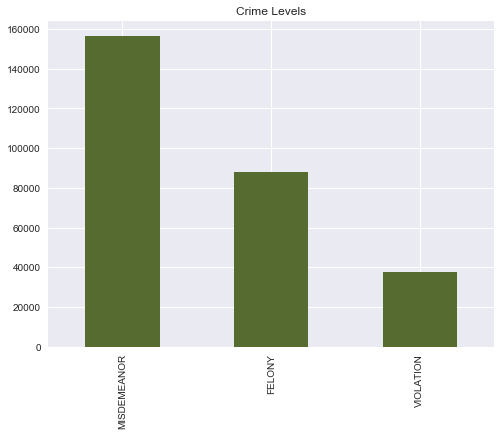

In [14]:
#Frequencies of each level of crime
pd.value_counts(df1['Level']).plot.bar(figsize=(8,6),
                                      title="Crime Levels",
                                      sharex=True,
                                      sharey=True,
                                      legend=False,
                                      color="darkolivegreen")

- As you can see above, misdemeanors are the most common level of infraction. This is pretty intuitive because minsdemeanors are the least severe classification of crimes, they include petty theft and other less serious offenses.

- Violations (which are not crimes) are the least common infraction, but we have to keep in mind that our dataset comes from 911 calls and people are less likely to report things like smoking a ciggarette in Central Park or disorderly conduct.  

Now let's look at the specifics of the crimes committed.

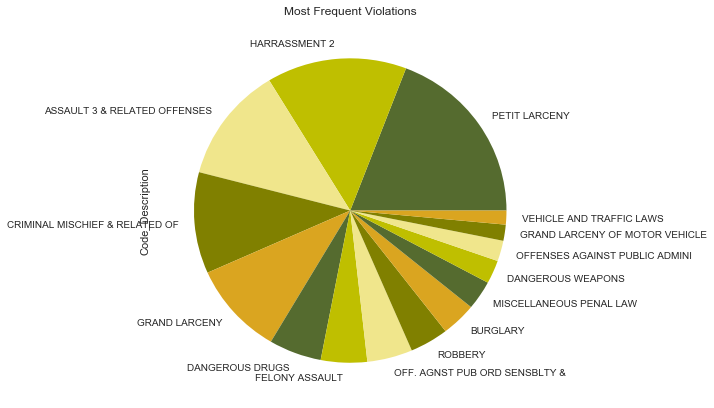

In [15]:
#most frequent classification codes
pd.value_counts(df1['Code_Description']).nlargest(15).plot.pie(title="Most Frequent Violations",
                                                                 figsize=(7,7),
                                                                 colors=["darkolivegreen","y","khaki","olive","goldenrod"],
        
                                                         )

- Above we see the top distribution of the top fifteen most common infractions.
- The three most prominent crimes in New York are petit larceny (stealing something under fifty dollars), harrassment and assault.

Now we will take a look at the top four jurisdictions that these infractions fall under.

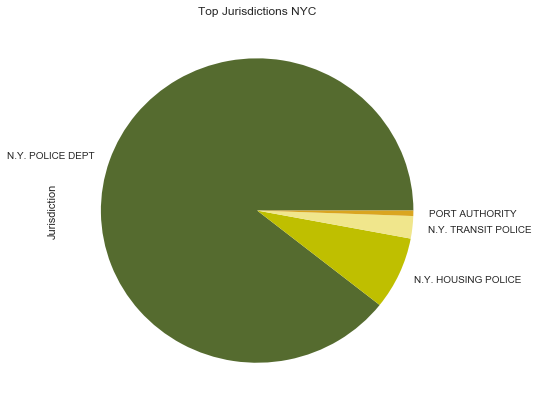

In [16]:
#Top Jurisdictions
pd.value_counts(df1['Jurisdiction']).nlargest(4).plot.pie(title="Top Jurisdictions NYC", 
                                                          figsize=(7,7),
                                                          colors=["darkolivegreen","y","khaki","goldenrod"] #assigning colors
                                                         )


- This pie chart shows the top 4 jurisdictions to which the phone calls were made.
- As we can see, most of the 911 calls were made the the New York Police Department, this indicates that transit and housing infractions deal with a smaller portion of the crimes and violations committed.

### 2. Risk Factors

Here we will look at the primary focus of this analysis, the risk factors for criminal activity. This section is divided into three sub sections: Geography, Location and Seasonality. At first glance it might appear that Geography and Location encapsulate the same type of information, but location is focused more on the premises of the incidents rather than their geographic location.


### 2.1. Geography

Our first risk factor, Geography, looks at the distribution of crimes between New York's boroughs as well as specific coordinate locations. This gives us an idea of which areas are more dangerous or prone to criminal activity. We will also take a look at New York's parks to determine which ones are reported to be more crime prone.

First we will look at the number of crimes on each borough. Since each borough has different population, the data will be normalized by population.

In [17]:
#criminality per borough
dfbor=pd.value_counts(df1['Borough']) #creating new dataframe thats counts the criminal activuty per borough

#we will now concatinate dfbor and our population dataframe dfpop
frames = [dfbor, dfpop] 
dfB = pd.concat(frames,axis=1) 

#change the column names to more intuitive ones
dfB.columns = ["Crime/Borough","Population"]
dfB.index.name = "Borough" #setting the index of our dataframe

#Creates column for a normalized look at the crime in each borough (crimes per thousand)
dfB['Crimes Per Thousand'] = dfB['Crime/Borough'] / (dfB['Population'] / 1000)
dfB

,Crime/Borough,Population,Crimes Per Thousand
Borough,,,
BROOKLYN,84381,2552911,33.052856
MANHATTAN,66752,1585873,42.091643
BRONX,62143,1385108,44.865094
QUEENS,55994,2250002,24.886200
STATEN ISLAND,13018,468730,27.772918


- Here we create the data frame that we will plot in the following graphic to visualize our findings.
- We have merged our information from our main data set with information about the population of each borough. 

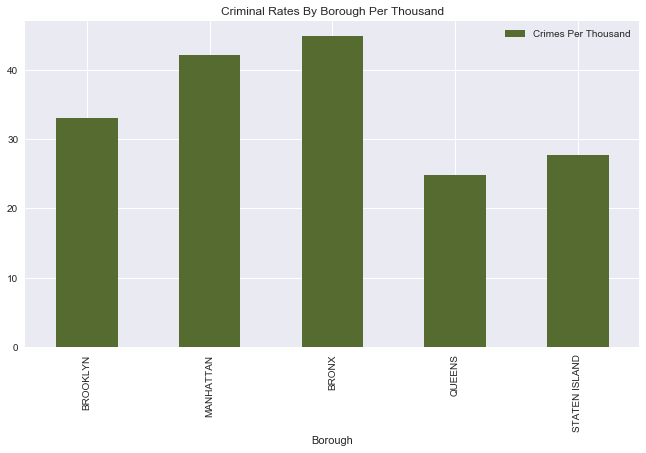

In [18]:
dfB["Crimes Per Thousand"].plot.bar(
                                        title="Criminal Rates By Borough Per Thousand",
                                        sharey=True,
                                        figsize=(11,6),
                                        legend=True,
                                        color="darkolivegreen")


- As we can see, the Bronx is the borough with the highest amount of crime reports for 2015. 
- Interestingly, if we hadn't normalized our data, Brooklyn would have appeared to be the most criminaly active borough. 
- This implies that Brooklyn may have highest criminal rates but the Bronx has highest criminal rates per capita.

Now we will look at specific coordinate locations of the crimes reported. This will give us an idea of which specific areas of New York experience higher criminality.

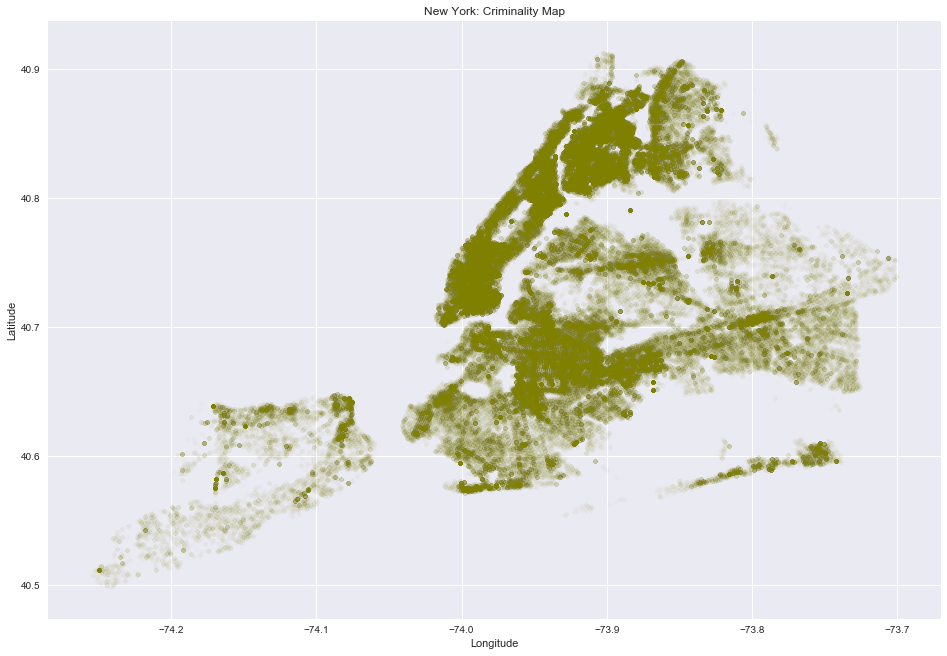

In [19]:
#Criminality map
df1.plot(kind='scatter',
         x='Longitude',
         y='Latitude',
         alpha=0.02, 
         figsize=(16,11), 
         color="olive",
         grid=True,
         title="New York: Criminality Map")

- The above scatterplot maps out New York by the coordinate locations of crimes reported. 
- Here it is easy to see that Staten Island has less reports than the other four boroughs, this is likely due to its smaller population density.
- Unfortunately, it is hard to see the differences between the other four boroughs.

The following figure however, gives us a more detailed look at the differences between these locations. We used gmplot to create a heat map indicating the areas of New York with the highest crime rates.

Please run the following cell, it will create a file in your directory with an interactive heat map and a pop-up tab should open the map automatically.

If the tab doesn't pop up, please look in your directory to open maps.html, you have likely encountered this problem because you are on a different OS.

The map might take a few seconds to load into the new window.


In [20]:
#create map
gmap = gmplot.GoogleMapPlotter(40.72, -73.968285, 10)

#plot coordinates on heat map
latitudes = [x for x in df['Latitude'].values.tolist() if not math.isnan(x)]
longitudes = [x for x in df['Longitude'].values.tolist() if not math.isnan(x)]
gmap.heatmap(latitudes[0:200000], longitudes[0:200000])

#draw map
gmap.draw('maps.html')

#getting path for html file
path = os.getcwd()

#launch in web browser
webbrowser.open_new("file://" + path + "/maps.html")

True

- This interactive heat map provides a better look at the frequency of reports in specific coordinate locations.
- To get a more detailed look at each location, zoom in and out of the map using the + - buttons at the bottom, the heat levels will change depending on your level of zoom.
- From out observations, we noticed that Hell's Kitchen and Mid Town had relatively higher levels of crime reports compared to the rest of Manhattan.

Next we will take the same approach to look at the crime reports parks around the city. We will create a smaller dataframe with only incidents that occured in Parks and then look for the Park with the highest criminal rate.

In [21]:
#first we create a dataframe that constists of only rows that have Parks listed
dfParks = df1[pd.notnull(df1["Park"])] #using pd.notnull we select only rows 

#Creates a pivot table that counts crimes in different parks
pivot_park = pd.pivot_table(
    data = dfp, #here we are using dfp (which we defined at the beginning). For our pivot table to work, id could not be the
                #index of our dataframe. So we are using dfp which is identical to df1 with the only difference that its index 
                #is not id
    index = 'Park',  
    values = 'id', 
    aggfunc = 'count'
)

sorted_park=pivot_park.sort_values('id', ascending = False) #sorting our table
sorted_park[0:10] #printing the top 10 instances

,id
Park,
CENTRAL PARK,205
FLUSHING MEADOWS CORONA PARK,115
RIVERSIDE PARK,67
ST. MARY'S PARK BRONX,54
CONEY ISLAND BEACH & BOARDWALK,53
CLAREMONT PARK,52
MARCUS GARVEY PARK,49
CROTONA PARK,47
VAN CORTLANDT PARK,44


- Above we have created a pivot table showing the ten parks with the most reported criminal activity.
- Central park tops the list, this is likely because of the size of it and how many people walk through it during the day. There are also a handful of rules that might lead to violations in the park such as "no smoking" which could spike up the numbers.
- It was surprising to see that St. Mary's Park in the Bronx accounted for 1/4th as many reports as Central Park while only occupying an estimated 1/24th of its size (35 acres vs 840 acres). This is coherent with our previous finding that there were several more crime reports in the Bronx than in any other borough.

Now we will look at another heat map representation of this data. Please run the following cell. A pop-up should appear with the heat map similarly to our previous heat map.

In [22]:
#Create map on google maps
gmap = gmplot.GoogleMapPlotter(40.72, -73.968285, 10)

#Plot longitude and latitudes of crimes committed in parks
latitudes_parks = [x for x in dfParks['Latitude'].values.tolist() if not math.isnan(x)]
longitudes_parks = [x for x in dfParks['Longitude'].values.tolist() if not math.isnan(x)]
gmap.heatmap(latitudes_parks[0:200000], longitudes_parks[0:200000]) #limiting sample to 200k, can do 1M but takes too long to load

#Draws the map
gmap.draw('maps2.html')

#Getting path for html file
path = os.getcwd()

#Open file in new tab (the map is interactive)
webbrowser.open_new("file://" + path + "/maps2.html")



True

### 2.2. Location

In this-sub section, we will look at the frequencies of crime reports comming from different premises.

In [23]:
#most frequent crimes per location (premises)
pivot_premises = pd.pivot_table(
    data = dfp, #here we are using dfp (which we defined at the beginning). For our pivot table to work, id could not be the
                #index of our dataframe. So we are using dfp which is identical to df1 with the only difference that its index 
                #is not id
    index = 'Premises',  
    values = 'id', 
    aggfunc = 'count'
)

sorted_piv_prem=pivot_premises.sort_values('id', ascending = False) #sorting our table
sorted_piv_prem

,id
Premises,
STREET,86785
RESIDENCE - APT. HOUSE,60494
RESIDENCE-HOUSE,25327
RESIDENCE - PUBLIC HOUSING,21619
OTHER,7801
CHAIN STORE,7459
COMMERCIAL BUILDING,7096
DEPARTMENT STORE,6788
TRANSIT - NYC SUBWAY,6596


- Above is a pivot table which counts the crime reports for each specific location where crimes have been committed.
- It is important to point out that this data is not normalized. We are simply looking at frequency which could depend on the amount of people in each of these places.

Let's take a better look at the locations with the highest frequencies of crime reports...

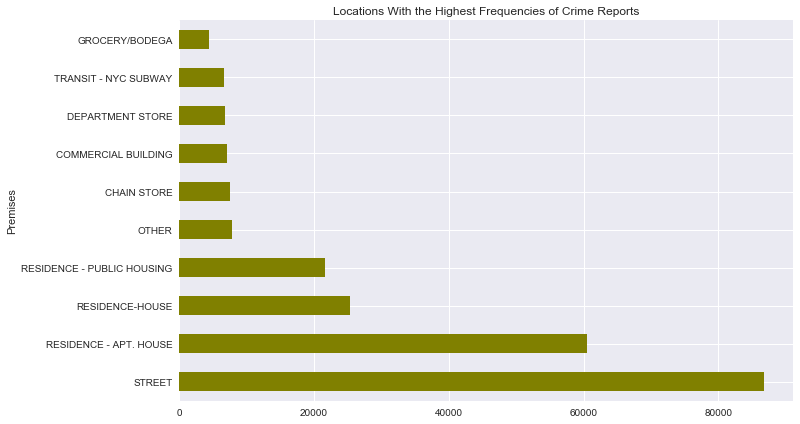

In [24]:
#Creates a bar chart showing the top 10 locations with the highest crime rates
sorted_piv_prem[0:10].plot(kind = 'barh',
                          figsize=(11,7),
                          title="Locations With the Highest Frequencies of Crime Reports",
                          color="olive",
                          legend = False)

- Not suprisingly, the highest frequencies of crime reports are in more populated areas. 
- We were suprised to see however, that apartments were the locations with the second highest reports. This means that much of the crime that is reported is domestic.
- Something important to point out, however, is that it is not clear from the data set whether these classifications reflect the actual location of the crime or the location where the phone call was made, these could lead to varying results.

### 2.3. Seasonality

This final sub-section looks at how seasonality and time of day affects the frequency of crime reports. We will also look more specifically at the top three crimes committed to see if they follow the same patterns as the dataset as a whole.

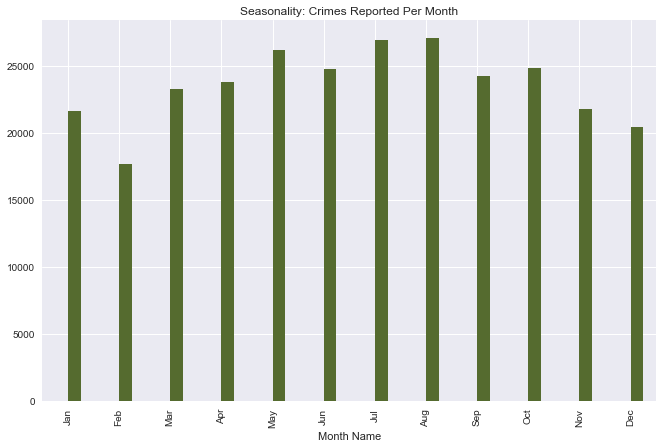

In [25]:
#Creating a dataframe with names of the months associated with numbers. 
months={'Month':[0,1,2,3,4,5,6,7,8,9,10,11,12],"Month_name":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug",
                                                            "Sep","Oct","Nov","Dec"]}
dfmonths = pd.DataFrame(months)

df4=df1 #making a copy of df1

df4['Month']=df4["Date_Time"].dt.month #making new column with just the month
df4=pd.value_counts(df1["Month"]).sort_index()

#concatinating two dataframes. this will allow our graph to have the month names on the x-axis rather than the 
#corresponding numbers (example: Jan instead of 1, Feb instead of 2 etc.)
frameMonths = [dfmonths, df4]
dfM = pd.concat(frameMonths,axis=1)

dfM = dfM.drop(dfM.index[0]) #dropping the first line which does not contain data

dfM.columns=["Month_num","Month Name","Counts"] #assigning new column names
dfM.set_index('Month Name') #setting the index
dfM

dfM.plot(kind="bar", 
                                   xlim=(1,12),
                                   figsize=(11,7),
                                   color="darkolivegreen",
                                   title="Seasonality: Crimes Reported Per Month",
                                   sharey=True,
                                   sharex=True,
                                   legend = False,
                                   x = 'Month Name'
                                                )

- The bar chart above describes the frequency of crime reports for each month of the year.
- We noticed an interesting trend in this data, it seems that crimes (or at least crime reports) are in fact seasonal, the bars draw a rough sinusoid curve with August as a peak and February as a trough. These are coincidentally also some of the hottest and coldest months respectively.
- This trend is true for the data set as a whole but does it hold true for specific crimes?

Lets take a look at the top three crime types to see if the trend holds.

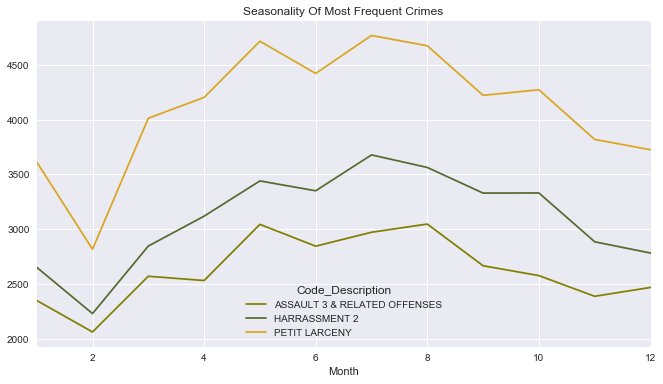

In [26]:
dfp['Month']=dfp["Date_Time"].dt.month 
code1=dfp['Code_Description']=="PETIT LARCENY" #classification condition 1
dfp1=dfp[code1]

code2=dfp['Code_Description']=="HARRASSMENT 2" #classification condition 2
dfp2=dfp[code2]

code3=dfp['Code_Description']=="ASSAULT 3 & RELATED OFFENSES" #classification condition 3
dfp3=dfp[code3]

frames = [dfp1, dfp2, dfp3]
dfP = pd.concat(frames,join='outer',join_axes=None)

pivot_codes = pd.pivot_table(
    data = dfP, #here we are using dfp (which we defined at the beginning). For our pivot table to work, id could not be the
                #index of our dataframe. So we are using dfp which is identical to df1 with the only difference that its index 
                #is not id
    index = 'Month',  
    values = 'id', 
    columns="Code_Description",
    aggfunc = 'count'
)

pivot_codes.plot(figsize=(11,6),
                grid=True,
                color=["olive","darkolivegreen","goldenrod"],
                title="Seasonality Of Most Frequent Crimes")

- It seems that the trend we saw in our data set holds true for some specific crimes as well, at least these top three.

Lets see what other time-based trends we can find about this data set.

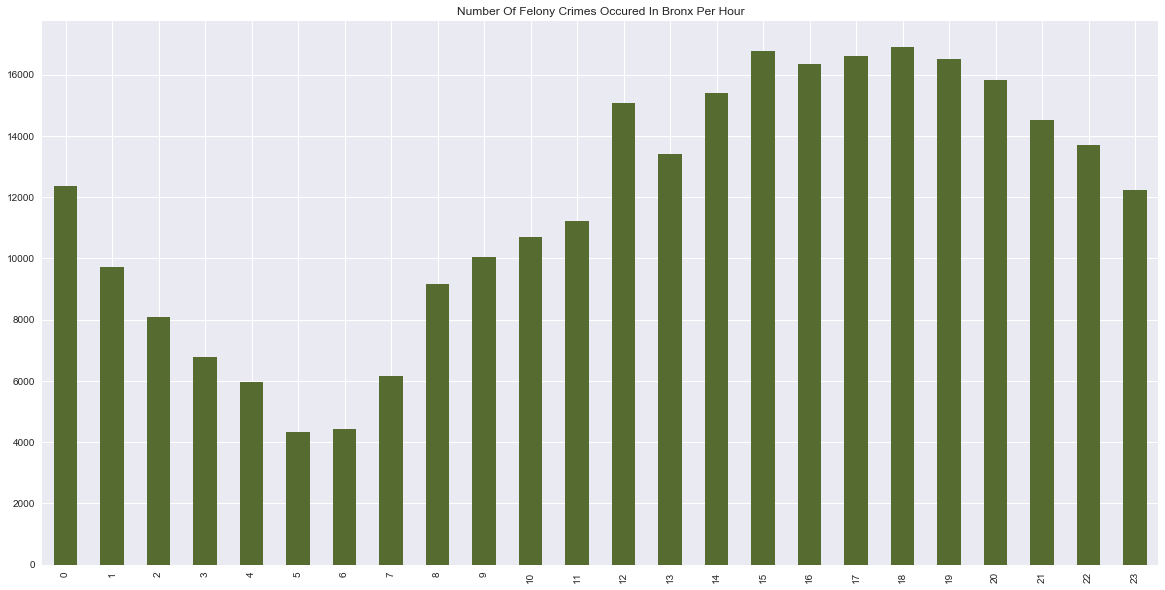

In [27]:
#if we make this more efficient (ie without having to create a new column it would be better)
df1['Hour'] = df1['Date_Time'].dt.hour #creating column with just the hours

#times that crimes are committed in New York City
pd.value_counts(df1['Hour']).sort_index().plot(kind="bar",  #sort_index, makes everything appear in order 0-24
                                  xlim=(0,23),
                                  figsize=(20,10),
                                  color="darkolivegreen",
                                  title="Number Of Felony Crimes Occured In Bronx Per Hour",
                                  sharex=True,
                                  legend=False)

- This bar chart shows the varying frequencies of crime reports throughout a typical day of the year in NYC.
- Again, we see another sinusoid curve drawn by the bars. The reason for this is more obvious because people tend to be asleep at night and awake during the day.
- Interestingly, 12:00 pm breaks the curve with a significantly higher frequency of crimes than its surrounding hours. 

<center><h1>Conclusion

Throughout our study of this data set, we came up with many interesting observations. 

   In our first sub-section, we found that The Bronx appears to be the borough with the most criminal activity per capita (if we are to believe that the reporting is consistent with the actual levels of crime). We also found that Central Park was the park with the highest frequency of reports, this is likely due to its size. More interestingly, however, we found that Saint Mary's park accounted for 1/4th the amount of crime as Central Park while only taking up 1/24th the amount of space. 
    
   Next, while analyzing the "Location" risk factor, we found that most crimes occur on the street. This result was expected due to the fact that streets are a high-traffic area. What was surprising, however, was to see that the second most reported area was residential apartments. If you join apartments and houses together, residences in general actually beat out streets as the most heavily reported on areas. The reason this was surprising is that these are not public locations, contrary to many other locations. This indicates that much of the crime committed in NYC is domestic.
    
   Our final sub-section highlighted some interesting things about how seasons and time affect crime rates. The most prominent trend in both our seasonal and time figures was a sinusoid curve. It is easier to explain why the time-of-day figure was sinusoid because it is likely due to the majority of peoples' sleeping schedules. The sinusoid nature of the seasonal figure is slightly more difficult to explain but one of the factors that might play a role in this is temperature, we found that the "trough" of the sin curve was during the colder months and the "peak" was during the warmer months. 
    
   Although there may be many more risk factors that influence crime reporting in New York City, we believe our analysis has highlighted some of the more important ones. 
    